In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [2]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

  clean = emoji_pattern.sub(r'', text) # no emoji
  return clean

def cleansing(tweet:str):
  # Remove hashtag sign but keep the text
  content = tweet.replace("\n", " ").replace("#", "").replace("_", " ").replace("@", "").replace('&amp;', 'and')
  # Remove emojis
  content = remove_emoji(content)
  # Remove any links
  content = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", content)
  content = re.sub('&lt;/?[a-z]+&gt;', '', content)

  return content.strip()

In [3]:
df = pd.read_csv("data/crypto_tweets.csv",index_col=0)
df.head()

,user_name,date,likes,retweets,content,hashtags
0,aussieruled,2022-10-31 01:08:24+00:00,512,9,"@WatcherGuru Great, now how many scammers goin...",NaN
1,OlimpioCrypto,2022-10-30 14:38:03+00:00,1159,314,"Hey @elonmusk, here's the first order of busin...",NaN
2,binance,2022-10-30 07:00:00+00:00,977,286,"As a #Binance user, having a strong eye for co...",['Binance']
3,SilvermanJacob,2022-10-29 18:27:04+00:00,322,50,"Elon bad, sure, but the reverence for the old ...",NaN
4,romoolo,2022-10-29 11:13:00+00:00,778,34,Should I stop encouraging friends to study Bit...,NaN


In [4]:
df["clean"] = df["content"].apply(cleansing)
tweets = pd.DataFrame(df["clean"])
tweets.columns = ["text"]
tweets.head()

,text
0,"WatcherGuru Great, now how many scammers going..."
1,"Hey elonmusk, here's the first order of busine..."
2,"As a Binance user, having a strong eye for com..."
3,"Elon bad, sure, but the reverence for the old ..."
4,Should I stop encouraging friends to study Bit...


In [5]:
tweets["polarity"] = tweets["text"].apply(lambda t: TextBlob(t).sentiment.polarity)
tweets["subjectivity"] = tweets["text"].apply(lambda t: TextBlob(t).sentiment.subjectivity)

tweets.head()

,text,polarity,subjectivity
0,"WatcherGuru Great, now how many scammers going...",0.650000,0.625000
1,"Hey elonmusk, here's the first order of busine...",0.083333,0.311111
2,"As a Binance user, having a strong eye for com...",0.058333,0.683333
3,"Elon bad, sure, but the reverence for the old ...",-0.203571,0.506746
4,Should I stop encouraging friends to study Bit...,0.046429,0.526190


In [6]:
tweets["polarity"].describe()

count    400.000000
mean       0.079428
std        0.239672
min       -1.000000
25%       -0.009375
50%        0.023611
75%        0.200000
max        1.000000
Name: polarity, dtype: float64

In [7]:
def get_sentiment(score):
  if score > 0.15:
    return "positive"
  elif score < 0.10:
    return "negative"
  else:
    return "neutral"

 ### Sentimental Analysis: Subjectivity & Polarity

 * Subjectivity detection aims to remove 'factual' or 'neutral' content, objective text that does not contain any opinion.
 * Polarity detection aims to differentiate the opinion into 'positive' and 'negative'.

 Sentiment analysis focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

In [8]:
tweets["sentiment"] = tweets["polarity"].apply(get_sentiment)
tweets.head()

,text,polarity,subjectivity,sentiment
0,"WatcherGuru Great, now how many scammers going...",0.650000,0.625000,positive
1,"Hey elonmusk, here's the first order of busine...",0.083333,0.311111,negative
2,"As a Binance user, having a strong eye for com...",0.058333,0.683333,negative
3,"Elon bad, sure, but the reverence for the old ...",-0.203571,0.506746,negative
4,Should I stop encouraging friends to study Bit...,0.046429,0.526190,negative


In [9]:
tweets.isnull().values.any()

False

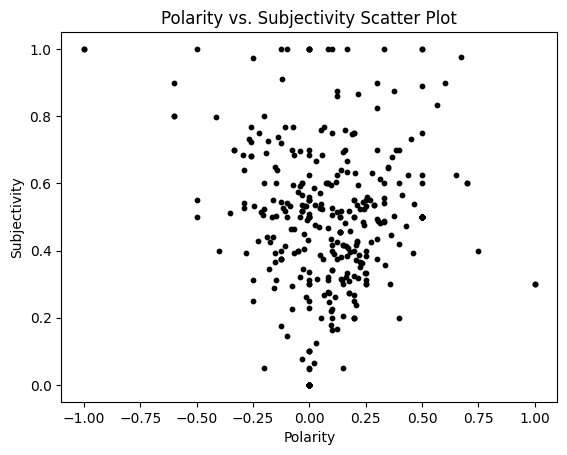

In [10]:
plt.scatter(tweets["polarity"],tweets["subjectivity"],color="black",s=10)
plt.title("Polarity vs. Subjectivity Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

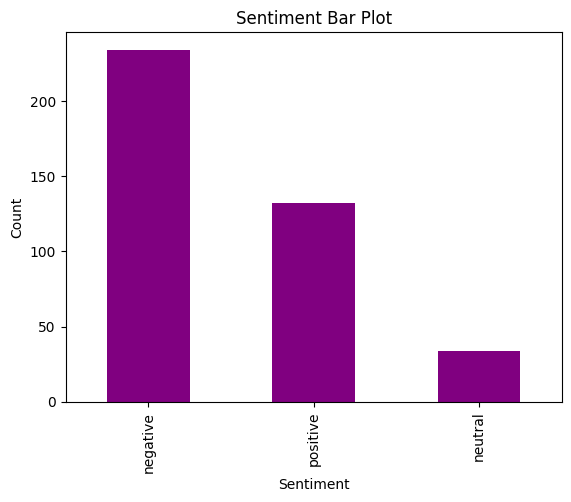

In [11]:
tweets["sentiment"].value_counts().plot(kind="bar",color="purple")
plt.title("Sentiment Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [12]:
tweets["sentiment"].value_counts(normalize=True)

negative    0.585
positive    0.330
neutral     0.085
Name: sentiment, dtype: float64

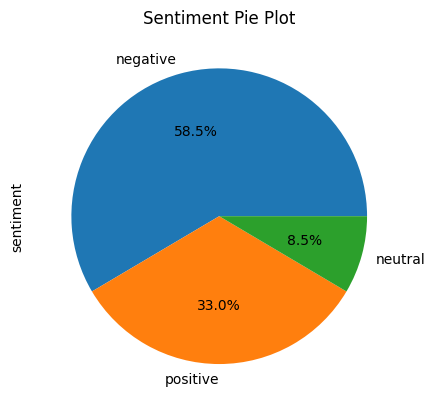

In [13]:
tweets["sentiment"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Sentiment Pie Plot")
plt.show()

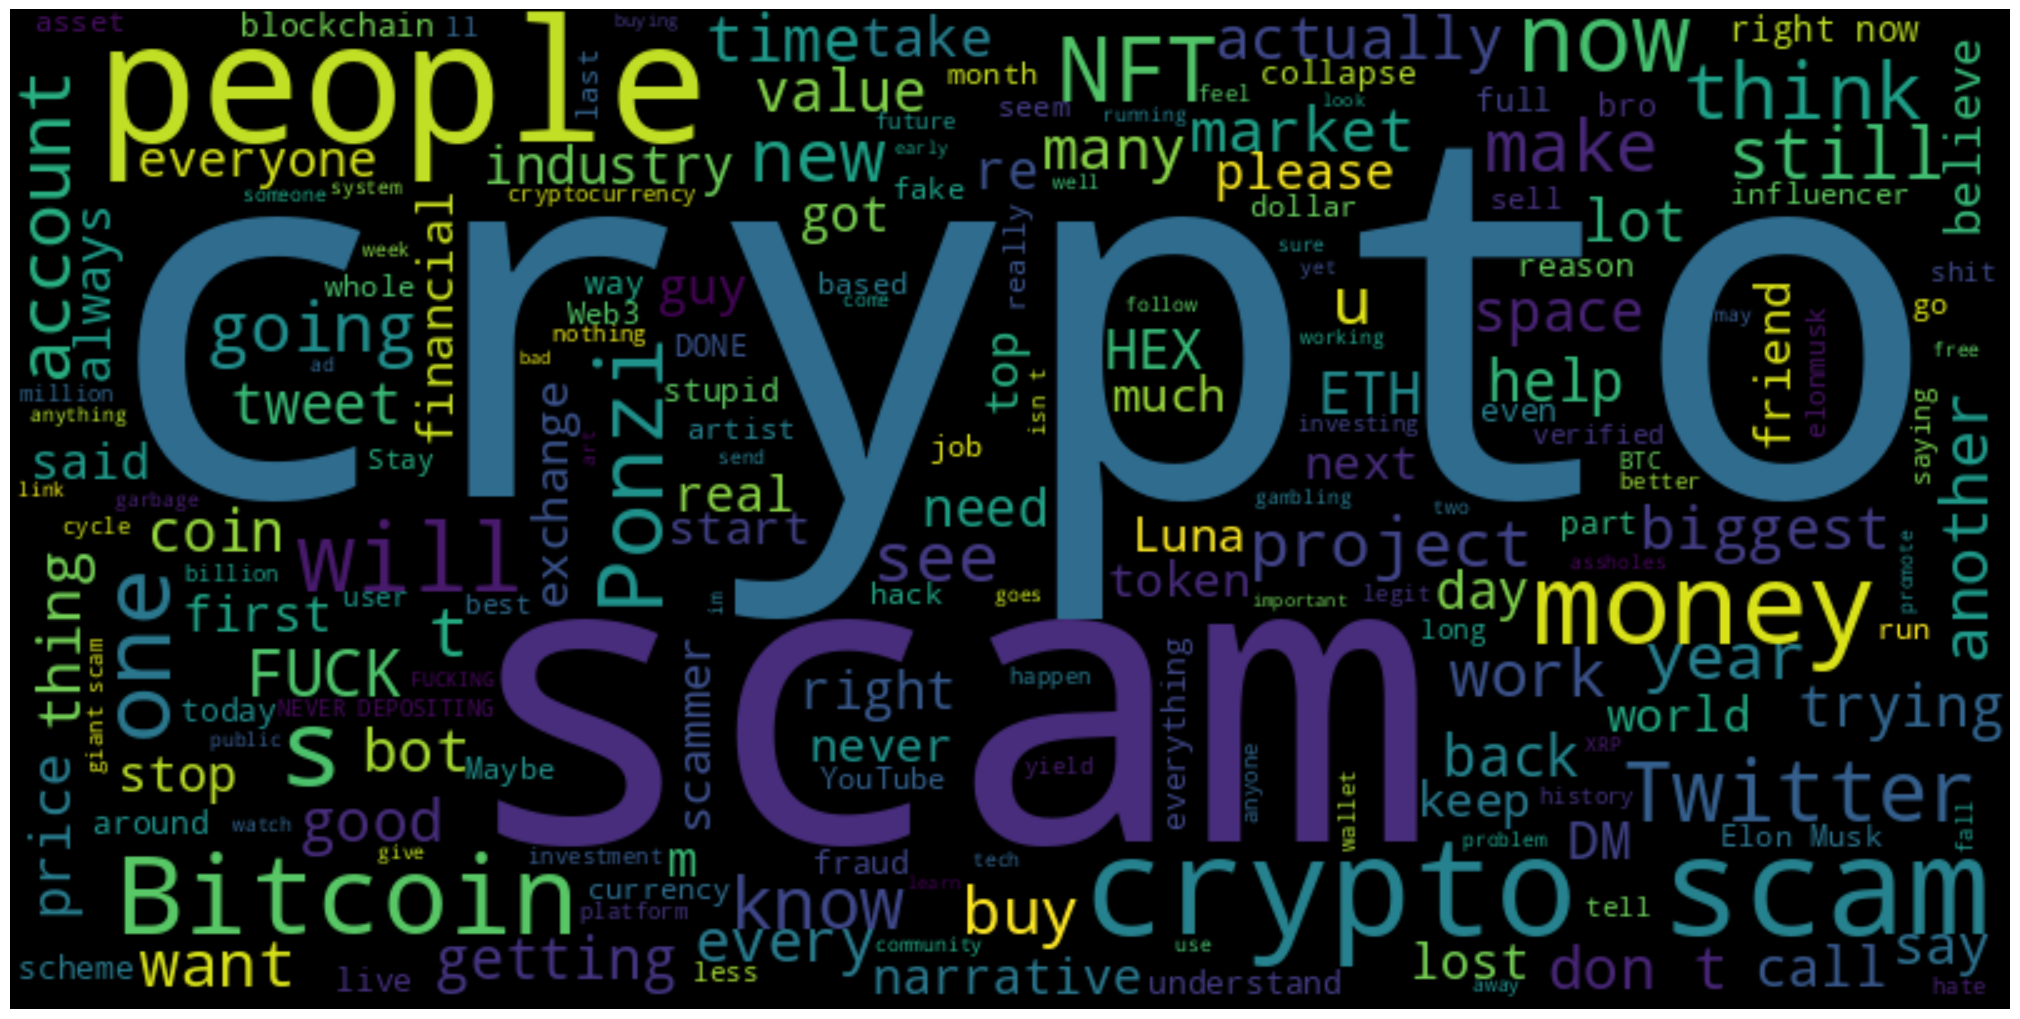

In [14]:
text = " ".join(list(tweets["text"]))

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

 ### Larger sample data

 Now I take a dataset with 3000 tweets.

In [15]:
df = pd.read_csv("data/crypto_tweets_3000.csv", index_col=0)
df.head()

,user_name,date,likes,retweets,content,hashtags
0,GaryGensler,2022-10-31 19:57:28+00:00,11226,1590,Happy 14th birthday to Satoshi Nakamoto’s whit...,NaN
1,lawrenceraul38,2022-10-31 04:22:06+00:00,6157,169,@crypto_bitlord7 @spectatorindex This is not a...,NaN
2,VitalikButerin,2022-10-30 03:17:33+00:00,13050,1484,Should I publicly blab my opinions about crypt...,NaN
3,Ranting_Trans,2022-10-29 21:58:32+00:00,48824,4447,"""No one actually thinks you're a woman, they'r...",NaN
4,DU09BTC,2022-10-29 08:10:36+00:00,5936,1332,Wait till the end. 👇\n\n#FTX CEO has lost the ...,['FTX']


In [16]:
df["clean"] = df["content"].apply(cleansing)
df.head()

,user_name,date,likes,retweets,content,hashtags,clean
0,GaryGensler,2022-10-31 19:57:28+00:00,11226,1590,Happy 14th birthday to Satoshi Nakamoto’s whit...,NaN,Happy 14th birthday to Satoshi Nakamoto’s whit...
1,lawrenceraul38,2022-10-31 04:22:06+00:00,6157,169,@crypto_bitlord7 @spectatorindex This is not a...,NaN,crypto bitlord7 spectatorindex This is not an ...
2,VitalikButerin,2022-10-30 03:17:33+00:00,13050,1484,Should I publicly blab my opinions about crypt...,NaN,Should I publicly blab my opinions about crypt...
3,Ranting_Trans,2022-10-29 21:58:32+00:00,48824,4447,"""No one actually thinks you're a woman, they'r...",NaN,"""No one actually thinks you're a woman, they'r..."
4,DU09BTC,2022-10-29 08:10:36+00:00,5936,1332,Wait till the end. 👇\n\n#FTX CEO has lost the ...,['FTX'],Wait till the end. FTX CEO has lost the plot...


In [17]:
tweets = pd.DataFrame(df[["user_name","clean"]])
tweets.columns = ["user_name","text"]
tweets.head()

,user_name,text
0,GaryGensler,Happy 14th birthday to Satoshi Nakamoto’s whit...
1,lawrenceraul38,crypto bitlord7 spectatorindex This is not an ...
2,VitalikButerin,Should I publicly blab my opinions about crypt...
3,Ranting_Trans,"""No one actually thinks you're a woman, they'r..."
4,DU09BTC,Wait till the end. FTX CEO has lost the plot...


In [18]:
tweets["polarity"] = tweets["text"].apply(
    lambda t: TextBlob(t).sentiment.polarity)
tweets["subjectivity"] = tweets["text"].apply(
    lambda t: TextBlob(t).sentiment.subjectivity)

tweets.head()

,user_name,text,polarity,subjectivity
0,GaryGensler,Happy 14th birthday to Satoshi Nakamoto’s whit...,0.500000,0.662963
1,lawrenceraul38,crypto bitlord7 spectatorindex This is not an ...,0.000000,0.000000
2,VitalikButerin,Should I publicly blab my opinions about crypt...,0.079167,0.506944
3,Ranting_Trans,"""No one actually thinks you're a woman, they'r...",0.133333,0.833333
4,DU09BTC,Wait till the end. FTX CEO has lost the plot...,-0.130000,1.000000


In [19]:
tweets.describe()

,polarity,subjectivity
count,2719.000000,2719.000000
mean,0.078266,0.335921
std,0.248915,0.298905
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.341667
75%,0.188393,0.550000
max,1.000000,1.000000


In [20]:
def get_sentiment(score):
  if score > 0.15:
    return "positive"
  elif score < 0.10:
    return "negative"
  else:
    return "neutral"

In [21]:
tweets["sentiment"] = tweets["polarity"].apply(get_sentiment)
tweets.head()

,user_name,text,polarity,subjectivity,sentiment
0,GaryGensler,Happy 14th birthday to Satoshi Nakamoto’s whit...,0.500000,0.662963,positive
1,lawrenceraul38,crypto bitlord7 spectatorindex This is not an ...,0.000000,0.000000,negative
2,VitalikButerin,Should I publicly blab my opinions about crypt...,0.079167,0.506944,negative
3,Ranting_Trans,"""No one actually thinks you're a woman, they'r...",0.133333,0.833333,neutral
4,DU09BTC,Wait till the end. FTX CEO has lost the plot...,-0.130000,1.000000,negative


In [22]:
tweets.isnull().values.any()

False

In [23]:
s_tweets = tweets[tweets["subjectivity"] > 0.7].sort_values(by="subjectivity")

s_tweets.head()

,user_name,text,polarity,subjectivity,sentiment
1787,smc90,1/ OK. So I have an exciting career update – a...,0.316667,0.7,positive
1093,MoonOverlord,crypto really be like sorry 1 line of code was...,-0.266667,0.7,negative
666,NFTHawks,For 1 ETH I will pose as a couples therapist a...,0.700000,0.7,positive
2462,HukAleksandra,"I bought, ADA at $0.03 CRO at $0.16 VRA at $0...",0.550000,0.7,positive
1525,osf_nft,1. NFT/CRYPTO DISASTER RECOVERY. Sitting on bi...,-0.250000,0.7,negative


In [24]:
s_tweets.describe()

,polarity,subjectivity
count,327.000000,327.000000
mean,0.112175,0.861488
std,0.459373,0.108147
min,-1.000000,0.700000
25%,-0.125000,0.750000
50%,0.116667,0.833333
75%,0.437500,1.000000
max,1.000000,1.000000


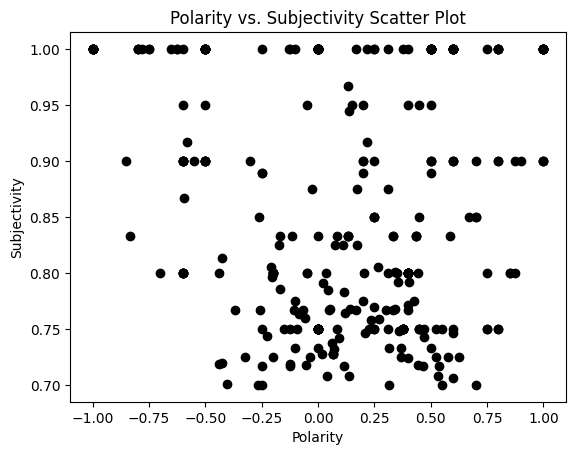

In [25]:
plt.scatter(s_tweets["polarity"],s_tweets["subjectivity"],color="black")
plt.title("Polarity vs. Subjectivity Scatter Plot")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

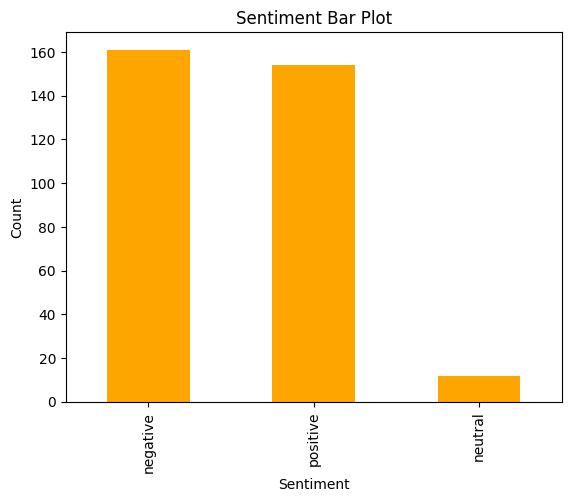

In [26]:
s_tweets["sentiment"].value_counts().plot(kind="bar",color="orange")
plt.title("Sentiment Bar Plot")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [27]:
p_tweets = s_tweets.sort_values(by="polarity")

# for i in range(0,20):
#   print(f"{i}.", p_tweets["text"].iloc[i], f"~ @{p_tweets['user_name'].iloc[i]}")

p_tweets.head()

,user_name,text,polarity,subjectivity,sentiment
443,BTC_Archive,FTX CEO: worst of crypto liquidity crunch is o...,-1.0,1.0,negative
2413,fppf_gf,"""if crypto is a pyramid scheme then so is all ...",-1.0,1.0,negative
2492,stephiroth__,someone said the netflix cowboy bebop version ...,-1.0,1.0,negative
1522,Pentosh1,Crypto bros thinking Russia will buy $BTC if n...,-1.0,1.0,negative
1065,CramerTracker,Horrible news for Ethereum and crypto markets,-1.0,1.0,negative


In [28]:
negative_tweets_examples = [0, 1, 4, 8]

for i in negative_tweets_examples:
  print("-", p_tweets["text"].iloc[i], f"~ @{p_tweets['user_name'].iloc[i]}\n")

- FTX CEO: worst of crypto liquidity crunch is over. 🧐 ~ @BTC_Archive

- "if crypto is a pyramid scheme then so is all of capitalism" i have terrible news for you about capitalism ~ @fppf_gf

- Horrible news for Ethereum and crypto markets ~ @CramerTracker

- cash is worthless. stocks are worthless. nft’s are worthless. crypto is worthless. at what point do i need how to learn how to make fire using a rock?! ~ @mikemajlak



In [29]:
p_tweets = s_tweets.sort_values(by="polarity",ascending=False)

# for i in range(0,20):
#   print(f"{i}.", p_tweets["text"].iloc[i], f"~ @{p_tweets['user_name'].iloc[i]}")

p_tweets.head()

,user_name,text,polarity,subjectivity,sentiment
147,LilMoonLambo,This is the greatest crypto video of all time,1.0,1.0,positive
1609,missteencrypto,It’s my 19th Birthday! Happy to celebrate with...,1.0,1.0,positive
150,cz_binance,Welcome Nasdaq to crypto! 🤝 » Nasdaq To Laun...,1.0,0.9,positive
2127,udiWertheimer,crypto going to zero is going to be the greate...,1.0,1.0,positive
619,sandofsky,The perfect setup for crypto traders.,1.0,1.0,positive


In [30]:
positive_tweets_examples = [1, 8, 9, 12]

for i in positive_tweets_examples:
  print("-", p_tweets["text"].iloc[i], f"~ @{p_tweets['user_name'].iloc[i]}\n")

- It’s my 19th Birthday! Happy to celebrate with all of my friends on Crypto Twitter! 🥰🥳❤️ ~ @missteencrypto

- This is the greatest crypto video of all time ~ @LilMoonLambo

- Luna made history in this space with the fall. Now it’s time to make the greatest comeback in the history of crypto $LUNA ~ @PumpMasterr

- If you loved Uptober, then Moonvember will blow your mind! crypto ~ @TheCryptoLark

